![title](szeged.png)

Szeged (/ˈsɛɡɛd/ SEG-ed, Hungarian: is the third largest city of Hungary, the largest city and regional centre of the Southern Great Plain and the county seat of Csongrád-Csanád county-

Content

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:

    1.Time
    2.Summary
    3.PrecipType
    4.Temperature
    5.ApparentTemperature
    6.Humidity
    7.WindSpeed
    8.WindBearing
    9.Visibility
    10.LoudCover
    11.Pressure


Database link: https://www.kaggle.com/budincsevity/szeged-weather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set the plots to display in the Jupyter notebook
%matplotlib inline

# Plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10

In [2]:
# Reading the data file
weather = pd.read_csv('DataSets/weather_szeged_2006-2016.csv')

In [3]:
# Show some of value inside the DF
weather.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.

In [4]:
# Stating different types of data for each columns in the DF
weather.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [5]:
# Show the number of columns & rows in the DF
weather.shape

(96453, 12)

In [6]:
# Calculate the rough total number of rows in the dataframe
def  row_amt_mult(*args):
    product = 1
    
    for num in args:
        product = product * num
    return product

row_amt_mult(24,365,11)

96360

Diffence between 'weather.shape' & 'row_amt_mult' row count output is because there are some repeated row index which will be drop in later step.

In [7]:
# A function to get the information for specific medium
def df_info():
    while True:
        try:
            input_medium = int(input( " Choose 1: Shape\n Choose 2: Columns\n Choose 3: Data types\n Choose 4: Index\n Choose 5: Describe\n Choose 6: Head : "))
            
            if input_medium == 1:
                print ("This are the rows and columns of the DataFrame ",weather.shape)
            if input_medium == 2:
                print ("This are the list of columns for the DataFrame \n \n",weather.columns)
            if input_medium == 3:
                print ("This are the data types for the columns in DataFrame \n\n",weather.dtypes)
            if input_medium == 4:
                print( "The DataFrame is currently using this as index\n\n",weather.index) 
            if input_medium == 5:
                print("This are the summary of the DataFrame\n\n",weather.describe())
            if input_medium == 6:
                print("This are some of  the data from the DataFrame\n\n",weather.head())
            if input_medium == 0:
                break
    
        except Exception as ex:
            print("Ooops! There is an error: {} with exception: {}". format(type(ex).__name__,ex.args))
            continue 

df_info()

 Choose 1: Shape
 Choose 2: Columns
 Choose 3: Data types
 Choose 4: Index
 Choose 5: Describe
 Choose 6: Head : 5
This are the summary of the DataFrame

        Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std    

In [8]:
# Creat a class for filtering purposes for a better valuesvizualization
class Filter:
    def __init__(self, make):
        self.make = make
        print(self.make)
 
# Filter by column
    def filter_col(self, weather_df_test):
        self.test = weather
        self.weather_df_test = weather_df_test
        return self.test[self.weather_df_test]

# Filter by requirement
    def filter_req(self, weather_df_test, the_object):
        list_observe = []
        observe = ''
        while observe != 'all':
            observe = input( " Enter column name : ")
            if observe !='all':
                list_observe.append(observe)
                return self.test[self.test[weather_df_test] == the_object][[observe]]
            if observe == 'all':
                return self.test[self.test[weather_df_test] == the_object]       

In [9]:
# Create object out of the Filter class
df_one = Filter('create_df')

create_df


In [10]:
# Utilize the filter column method
df_one.filter_col(['Temperature (C)'])

Temperature (C)
0             9.472222
1             9.355556
2             9.377778
3             8.288889
4             8.755556
...                ...
96448        26.016667
96449        24.583333
96450        22.038889
96451        21.522222
96452        20.438889

[96453 rows x 1 columns]

In [11]:
# Utilize the specific requirement filter method
df_one.filter_req('Precip Type', 'snow')

 Enter column name : Temperature (C)


Temperature (C)
1562         -0.483333
1563         -0.483333
1564         -0.922222
1565         -1.038889
1566         -1.088889
...                ...
93265        -0.783333
93266        -1.111111
93267        -1.044444
93311        -0.511111
93506        -0.027778

[10712 rows x 1 columns]

What is UTC: Coordinated Universal Time or UTC is the primary time standard by which the world regulates clocks and time.      -Wikipedia-

In [12]:
weather.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.

In [13]:
# Deleting the UTC +0200 from the 'Formatted Date' in order to set this column as the index
weather['Formatted Date'] = weather['Formatted Date'].apply(lambda x:x[:-6])

In [14]:
# Convert 'Formatted Date' from object to DateTime
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])

In [15]:
# Set the 'Formatted Date as index
weather.set_index('Formatted Date', inplace=True)

In [16]:
weather.head(3)

Summary Precip Type  Temperature (C)  \
Formatted Date                                                    
2006-04-01 00:00:00  Partly Cloudy        rain         9.472222   
2006-04-01 01:00:00  Partly Cloudy        rain         9.355556   
2006-04-01 02:00:00  Mostly Cloudy        rain         9.377778   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                   251.0          15.8263         0.0   
2006-04-01 01:00:00                   259.0          15.8263         0.0   
2006-04-01 02:00:00                   204.0          14.9569         0.0   

                     Pressure (millibars)                      Daily Summary  
Formatted Date                                                                
2006-04-01 00:00:00               1015.13  Partly cloudy throughout the day.  
2006-04-01 01:00:00               1015.63  Partly cloudy throughout the day.  
2006-04-01 02:00:00               1015.94  Partly cloudy throughout the day.

ANALYSIS: Study between Temperature (C) & Apparent Temperature (C)

Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. Apparent temperature was invented by Robert Steadman who published a paper about it in 1984. -Wikipedia-

In [17]:
# Create sub DF for later temperature analysis
weather_temp = df_one.filter_col(['Temperature (C)','Apparent Temperature (C)'])
#weather_temp = weather[['Temperature (C)', 'Apparent Temperature (C)']]

print(weather_temp.head())
print(weather_temp.shape)

                     Temperature (C)  Apparent Temperature (C)
Formatted Date                                                
2006-04-01 00:00:00         9.472222                  7.388889
2006-04-01 01:00:00         9.355556                  7.227778
2006-04-01 02:00:00         9.377778                  9.377778
2006-04-01 03:00:00         8.288889                  5.944444
2006-04-01 04:00:00         8.755556                  6.977778
(96453, 2)


Average Daily Temperature
                Temperature (C)  Apparent Temperature (C)
Formatted Date                                           
2006-01-01             3.873148                 -0.447222
2006-01-02             5.418519                  2.042593
2006-01-03             2.319444                  0.223843
2006-01-04             2.274074                 -0.457407
2006-01-05             2.698148                  0.256481
...                         ...                       ...
2016-12-27             0.280324                 -3.158102
2016-12-28             0.224306                 -3.223611
2016-12-29             0.169676                 -3.268056
2016-12-30             0.119444                 -3.306019
2016-12-31             0.072454                 -3.352546

[4018 rows x 2 columns]
__________________________________________________________
       Temperature (C)  Apparent Temperature (C)
count      4018.000000               4018.000000
mean         11.930135                

<AxesSubplot:>

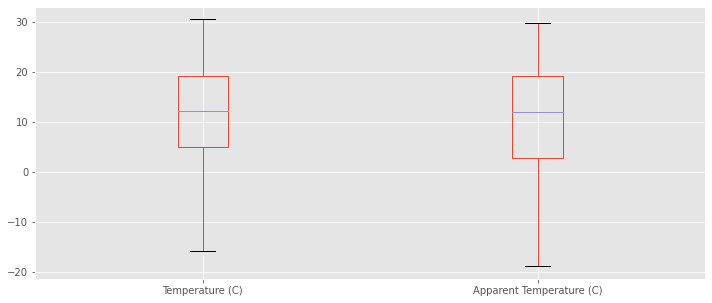

In [18]:
# Create a variable for daily average temperatures
avg_daily_temp = weather_temp.resample('24H').mean()


print('Average Daily Temperature')
print(avg_daily_temp)
print('__________________________________________________________')
print(avg_daily_temp.describe())

avg_daily_temp.plot(kind='box')


From the below line chart we see that there are obvious deviations between Temperature & Apparent Temperature from a period of November to April


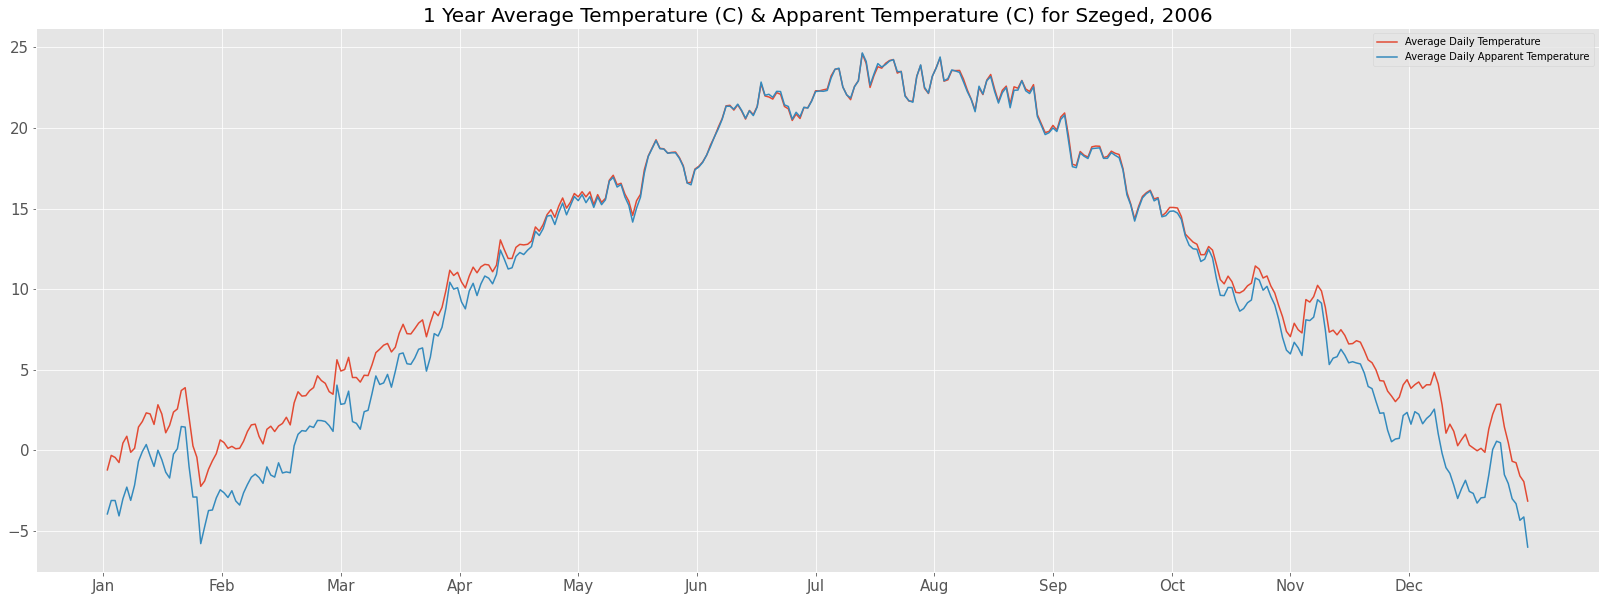

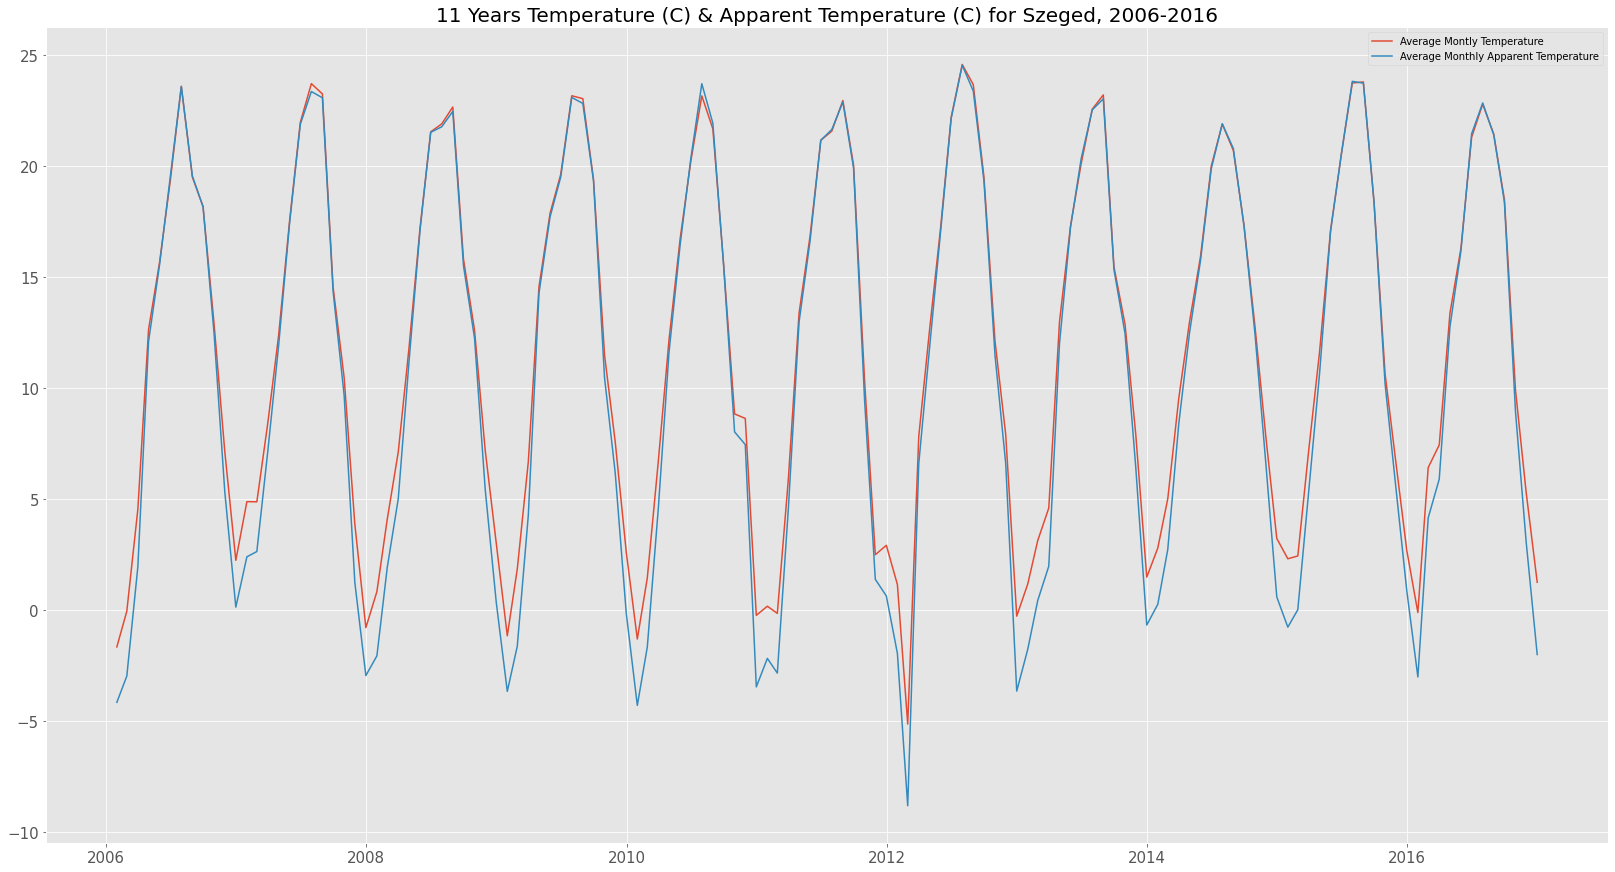

In [19]:
plt.figure(figsize=(28,10))

# Create variable for daily average temp for 1 year
oneyear_avg_daily_temp = avg_daily_temp.groupby(avg_daily_temp.index.day_of_year).mean()

# Plotting for 1 year daily average temperature of Temperature & Apparent Temperature
plt.plot(oneyear_avg_daily_temp.index, oneyear_avg_daily_temp['Temperature (C)'], label=('Average Daily Temperature'))
plt.plot(oneyear_avg_daily_temp.index, oneyear_avg_daily_temp['Apparent Temperature (C)'], label=('Average Daily Apparent Temperature'))

plt.title('1 Year Average Temperature (C) & Apparent Temperature (C) for Szeged, 2006', fontsize=20)
plt.xticks(np.linspace(0,366,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'), fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

print('\nFrom the below line chart we see that there are obvious deviations between Temperature & Apparent Temperature from a period of November to April')

# Create variable for monthly average temp
# Create variable for monthly average temp for 11 years
avg_monthly_temp = weather_temp.resample('1M').mean()
elevenyears_avg_monthly_temp = avg_monthly_temp.groupby(avg_monthly_temp.index).mean()
plt.figure(figsize=(28,15))

# Plotting for 11 years monthly average temperature of Temperature & Apparent Temperature
plt.plot(elevenyears_avg_monthly_temp.index, elevenyears_avg_monthly_temp['Temperature (C)'], label=('Average Montly Temperature'))
plt.plot(elevenyears_avg_monthly_temp.index, elevenyears_avg_monthly_temp['Apparent Temperature (C)'], label=('Average Monthly Apparent Temperature'))

plt.title('11 Years Temperature (C) & Apparent Temperature (C) for Szeged, 2006-2016', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

From the above line charts, it shows that deviations happened on early & at end of the year.
So why does this deviation happens at that specific time?. Does this correlate with what Robert Steadman said? air temperature, relative humidity and wind speed are what makes the Apparent Temperature that human body perceives?.

In [20]:
# Create sub DF fro humidity
#weather_humidity = weather[['Humidity']]
weather_humidity = df_one.filter_col(['Humidity'])

In [21]:
weather_humidity

Humidity
Formatted Date               
2006-04-01 00:00:00      0.89
2006-04-01 01:00:00      0.86
2006-04-01 02:00:00      0.89
2006-04-01 03:00:00      0.83
2006-04-01 04:00:00      0.83
...                       ...
2016-09-09 19:00:00      0.43
2016-09-09 20:00:00      0.48
2016-09-09 21:00:00      0.56
2016-09-09 22:00:00      0.60
2016-09-09 23:00:00      0.61

[96453 rows x 1 columns]

Average Daily Humidity
                Humidity
Formatted Date          
2006-01-01      0.818333
2006-01-02      0.844583
2006-01-03      0.898333
2006-01-04      0.905417
2006-01-05      0.948333
...                  ...
2016-12-27      0.890000
2016-12-28      0.890000
2016-12-29      0.889583
2016-12-30      0.889167
2016-12-31      0.888750

[4018 rows x 1 columns]
__________________________________________________________
          Humidity
count  4018.000000
mean      0.734882
std       0.134333
min       0.297917
25%       0.632500
50%       0.743333
75%       0.842500
max       0.995000


<AxesSubplot:>

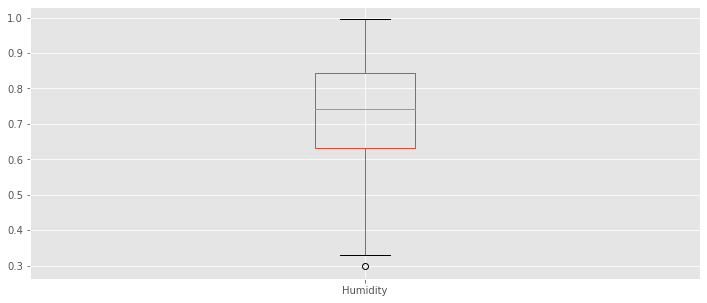

In [22]:
# Create a veriable for daily average humidty
avg_daily_humidity = weather_humidity.resample('24H').mean()

print('Average Daily Humidity')
print(avg_daily_humidity)
print('__________________________________________________________')
print(avg_daily_humidity.describe())

avg_daily_humidity.plot(kind='box')

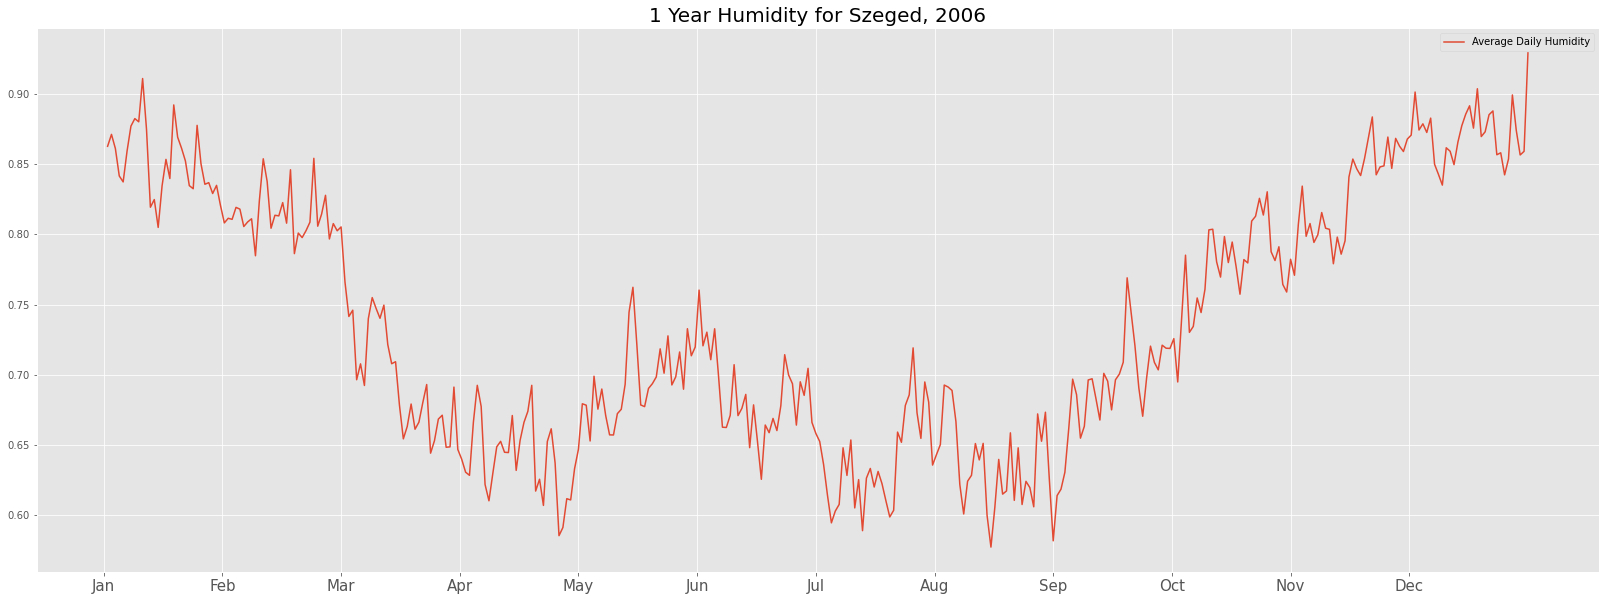

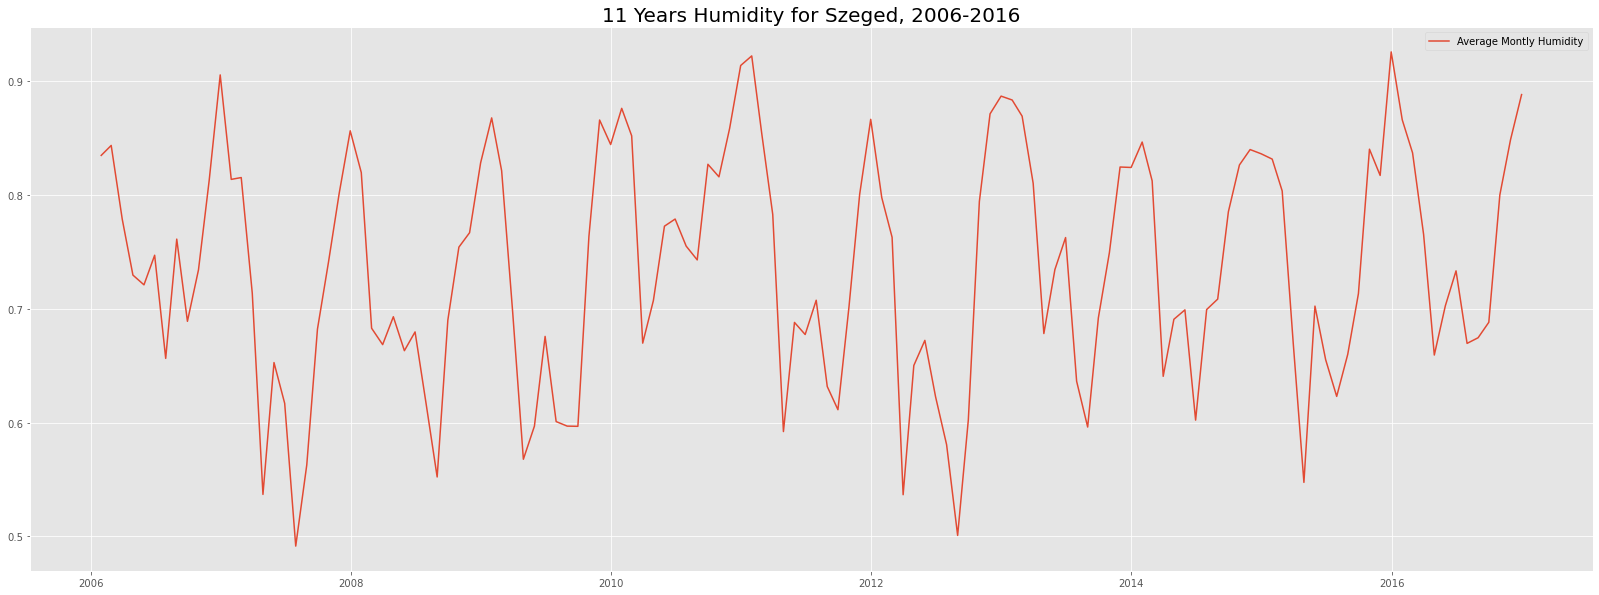

In [23]:
plt.figure(figsize=(28,10))

# Create variable for daily average humidity for 1 year
oneyear_avg_daily_humidity = avg_daily_humidity.groupby(avg_daily_humidity.index.day_of_year).mean()

# Plotting for 1 year daily average humidity
plt.plot(oneyear_avg_daily_humidity.index, oneyear_avg_daily_humidity, label=('Average Daily Humidity'))

plt.title('1 Year Humidity for Szeged, 2006', fontsize=20)
plt.xticks(np.linspace(0,366,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'), fontsize=15)
#plt.yticks(range(-10, 120, 10), fontsize=15)
plt.legend()

#print('\nFrom the below line chart we see that there are obvious deviations between Temperature & Apparent Temperature from a period of November to April')


plt.figure(figsize=(28,10))

# Create variable for monthly average humidity
# Create variable for monthly average humidity for 11 years
avg_monthly_humidity = weather_humidity.resample('1M').mean()
elevenyears_avg_monthly_humidity = avg_monthly_humidity.groupby(avg_monthly_humidity.index).mean()

# Plotting for 11 years monthly average humidity
plt.plot(elevenyears_avg_monthly_humidity.index, elevenyears_avg_monthly_humidity, label=('Average Montly Humidity'))

plt.title('11 Years Humidity for Szeged, 2006-2016', fontsize=20)
#plt.xticks(np.linspace(0,366,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'), fontsize=15)
#plt.yticks(range(-0.5, 1, 0.05), fontsize=15)
plt.legend()



Line graph from above shows that in the early & end of the year, humidity are high.

In [24]:
# Create sub DF fro humidity
#weather_wind= weather[['Wind Speed (km/h)']]
weather_wind = df_one.filter_col(['Wind Speed (km/h)'])

In [25]:
weather_wind

Wind Speed (km/h)
Formatted Date                        
2006-04-01 00:00:00            14.1197
2006-04-01 01:00:00            14.2646
2006-04-01 02:00:00             3.9284
2006-04-01 03:00:00            14.1036
2006-04-01 04:00:00            11.0446
...                                ...
2016-09-09 19:00:00            10.9963
2016-09-09 20:00:00            10.0947
2016-09-09 21:00:00             8.9838
2016-09-09 22:00:00            10.5294
2016-09-09 23:00:00             5.8765

[96453 rows x 1 columns]

In [ ]:
# Create a veriable for daily average wind speed
avg_daily_wind = weather_wind.resample('24H').mean()

print('Average Daily Wind Speed')
print(avg_daily_wind)
print('__________________________________________________________')
print(avg_daily_wind.describe())

avg_daily_wind.plot(kind='box')

In [ ]:
plt.figure(figsize=(28,10))

# Create variable for daily average wind speed for 1 year
oneyear_avg_daily_wind = avg_daily_wind.groupby(avg_daily_wind.index.day_of_year).mean()

# Plotting for 1 year daily average humidity
plt.plot(oneyear_avg_daily_wind.index, oneyear_avg_daily_wind, label=('Average Daily Wind Speed'))

plt.title('1 Year Wind Speed for Szeged, 2006', fontsize=20)
plt.xticks(np.linspace(0,366,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'), fontsize=15)
#plt.yticks(range(-10, 120, 10), fontsize=15)
plt.legend()

#print('\nFrom the below line chart we see that there are obvious deviations between Temperature & Apparent Temperature from a period of November to April')


plt.figure(figsize=(28,10))

# Create variable for monthly average wind speed
# Create variable for monthly average wind speed for 11 years
avg_monthly_wind = weather_wind.resample('1M').mean()
elevenyears_avg_monthly_wind = avg_monthly_wind.groupby(avg_monthly_wind.index).mean()

# Plotting for 11 years monthly average humidity
plt.plot(elevenyears_avg_monthly_wind.index, elevenyears_avg_monthly_wind, label=('Average Montly Wind Speed'))

plt.title('11 Years Wind Speed for Szeged, 2006-2016', fontsize=20)
#plt.xticks(np.linspace(0,366,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'), fontsize=15)
#plt.yticks(range(-0.5, 1, 0.05), fontsize=15)
plt.legend()

From both of the wind speed line graph, we can see that the value constantly moves up & down drastically, but we can still see that in the '1 Year Wind Speed for Szeged, 2006' line graph the value from december until next year april is higher than the other months. This concludes that what Robert Steadman said in his paper from 1984 is true! From my investigation the correlation between air temperature, humidy & wind speed did affect the temperature.

In [27]:
weather.shape

(96453, 11)

In [28]:
weather.index.unique()

DatetimeIndex(['2006-04-01 00:00:00', '2006-04-01 01:00:00',
               '2006-04-01 02:00:00', '2006-04-01 03:00:00',
               '2006-04-01 04:00:00', '2006-04-01 05:00:00',
               '2006-04-01 06:00:00', '2006-04-01 07:00:00',
               '2006-04-01 08:00:00', '2006-04-01 09:00:00',
               ...
               '2016-09-09 14:00:00', '2016-09-09 15:00:00',
               '2016-09-09 16:00:00', '2016-09-09 17:00:00',
               '2016-09-09 18:00:00', '2016-09-09 19:00:00',
               '2016-09-09 20:00:00', '2016-09-09 21:00:00',
               '2016-09-09 22:00:00', '2016-09-09 23:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=96418, freq=None)

In [30]:
# In order to create a dictionary based on weather DF index, i need to drop duplicates in the index
weather['index'] = weather.index
weather = weather.drop_duplicates('index')
weather.set_index = weather['index']
weather= weather.drop('index', axis =1)

In [31]:
# Create dictionary out of weather DF
weather_dict_index = weather.to_dict(orient='index')

In [32]:
weather_dict_index

{Timestamp('2006-04-01 00:00:00'): {'Summary': 'Partly Cloudy',
  'Precip Type': 'rain',
  'Temperature (C)': 9.47222222222222,
  'Apparent Temperature (C)': 7.388888888888887,
  'Humidity': 0.89,
  'Wind Speed (km/h)': 14.1197,
  'Wind Bearing (degrees)': 251.0,
  'Visibility (km)': 15.826300000000002,
  'Loud Cover': 0.0,
  'Pressure (millibars)': 1015.13,
  'Daily Summary': 'Partly cloudy throughout the day.'},
 Timestamp('2006-04-01 01:00:00'): {'Summary': 'Partly Cloudy',
  'Precip Type': 'rain',
  'Temperature (C)': 9.355555555555558,
  'Apparent Temperature (C)': 7.227777777777776,
  'Humidity': 0.86,
  'Wind Speed (km/h)': 14.2646,
  'Wind Bearing (degrees)': 259.0,
  'Visibility (km)': 15.826300000000002,
  'Loud Cover': 0.0,
  'Pressure (millibars)': 1015.63,
  'Daily Summary': 'Partly cloudy throughout the day.'},
 Timestamp('2006-04-01 02:00:00'): {'Summary': 'Mostly Cloudy',
  'Precip Type': 'rain',
  'Temperature (C)': 9.377777777777778,
  'Apparent Temperature (C)': 9.37

In [33]:
weather_dict_index.keys()

dict_keys([Timestamp('2006-04-01 00:00:00'), Timestamp('2006-04-01 01:00:00'), Timestamp('2006-04-01 02:00:00'), Timestamp('2006-04-01 03:00:00'), Timestamp('2006-04-01 04:00:00'), Timestamp('2006-04-01 05:00:00'), Timestamp('2006-04-01 06:00:00'), Timestamp('2006-04-01 07:00:00'), Timestamp('2006-04-01 08:00:00'), Timestamp('2006-04-01 09:00:00'), Timestamp('2006-04-01 10:00:00'), Timestamp('2006-04-01 11:00:00'), Timestamp('2006-04-01 12:00:00'), Timestamp('2006-04-01 13:00:00'), Timestamp('2006-04-01 14:00:00'), Timestamp('2006-04-01 15:00:00'), Timestamp('2006-04-01 16:00:00'), Timestamp('2006-04-01 17:00:00'), Timestamp('2006-04-01 18:00:00'), Timestamp('2006-04-01 19:00:00'), Timestamp('2006-04-01 20:00:00'), Timestamp('2006-04-01 21:00:00'), Timestamp('2006-04-01 22:00:00'), Timestamp('2006-04-01 23:00:00'), Timestamp('2006-04-10 00:00:00'), Timestamp('2006-04-10 01:00:00'), Timestamp('2006-04-10 02:00:00'), Timestamp('2006-04-10 03:00:00'), Timestamp('2006-04-10 04:00:00'), Tim

In [35]:
# Calling all column values using dictionary
weather_dict_index[pd.Timestamp('2012-04-11 12:00:00')]

{'Summary': 'Mostly Cloudy',
 'Precip Type': 'rain',
 'Temperature (C)': 17.22222222222222,
 'Apparent Temperature (C)': 17.22222222222222,
 'Humidity': 0.31,
 'Wind Speed (km/h)': 11.27,
 'Wind Bearing (degrees)': 180.0,
 'Visibility (km)': 9.982,
 'Loud Cover': 0.0,
 'Pressure (millibars)': 1004.7,
 'Daily Summary': 'Mostly cloudy until night.'}

In [36]:
# Calling all collumn values using 'loc'
weather.loc['2006-1-1 1:0:0' : '2006-1-1 2:0:0']

Summary Precip Type  Temperature (C)  \
Formatted Date                                                    
2006-01-01 01:00:00  Mostly Cloudy        rain         1.161111   
2006-01-01 02:00:00  Mostly Cloudy        rain         1.666667   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-01-01 01:00:00                 -3.238889      0.85            16.6152   
2006-01-01 02:00:00                 -3.155556      0.82            20.2538   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-01-01 01:00:00                   139.0           9.9015         0.0   
2006-01-01 02:00:00                   140.0           9.9015         0.0   

                     Pressure (millibars)                      Daily Summary  
Formatted Date                                                                
2006-01-01 01:00:00               1016.15  Mostly cloudy throughout the day.  
2006-01-01 02:00:00               1015.87  Mostly cloudy throughout the day.

THANK YOU!!!